# House Prices: Advanced Regression Techniques

## Part I: EDA

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

载入training data

In [5]:
df_train = pd.read_csv('./data/house-prices-advanced-regression-techniques/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


查看数据数量，变量。Try to predict __SalePrice__.

In [6]:
df_train.shape

(1460, 81)

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

check __SalePrice__

In [8]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Make a histogram. We can see it is right-skewed.

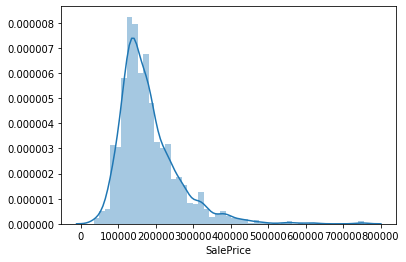

In [9]:
sns.distplot(df_train["SalePrice"])

#### Check correlation with other variables

continuous variables

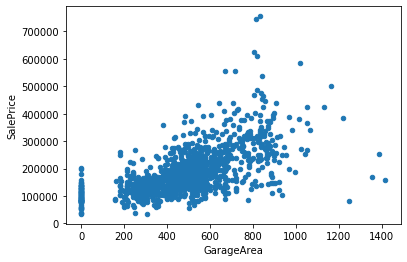

In [10]:
df_train.plot.scatter(x="GarageArea",y="SalePrice")

categorical variables

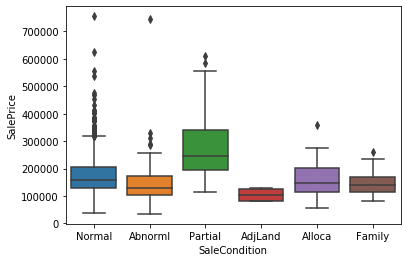

In [11]:
sns.boxplot(x="SaleCondition",y="SalePrice",data=df_train)

##### Correlation Matrix

In [12]:
cor_max = df_train.corr()
cor_max.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


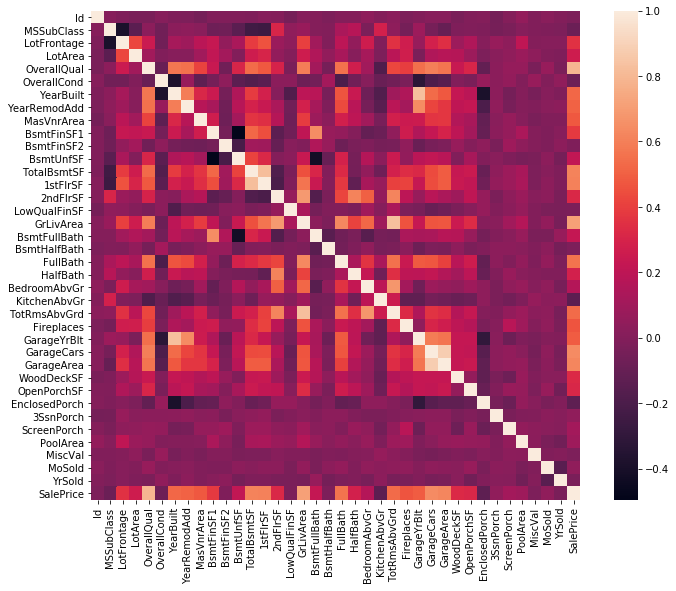

In [13]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cor_max,vmax=1,square=True)

##### pairwise plot

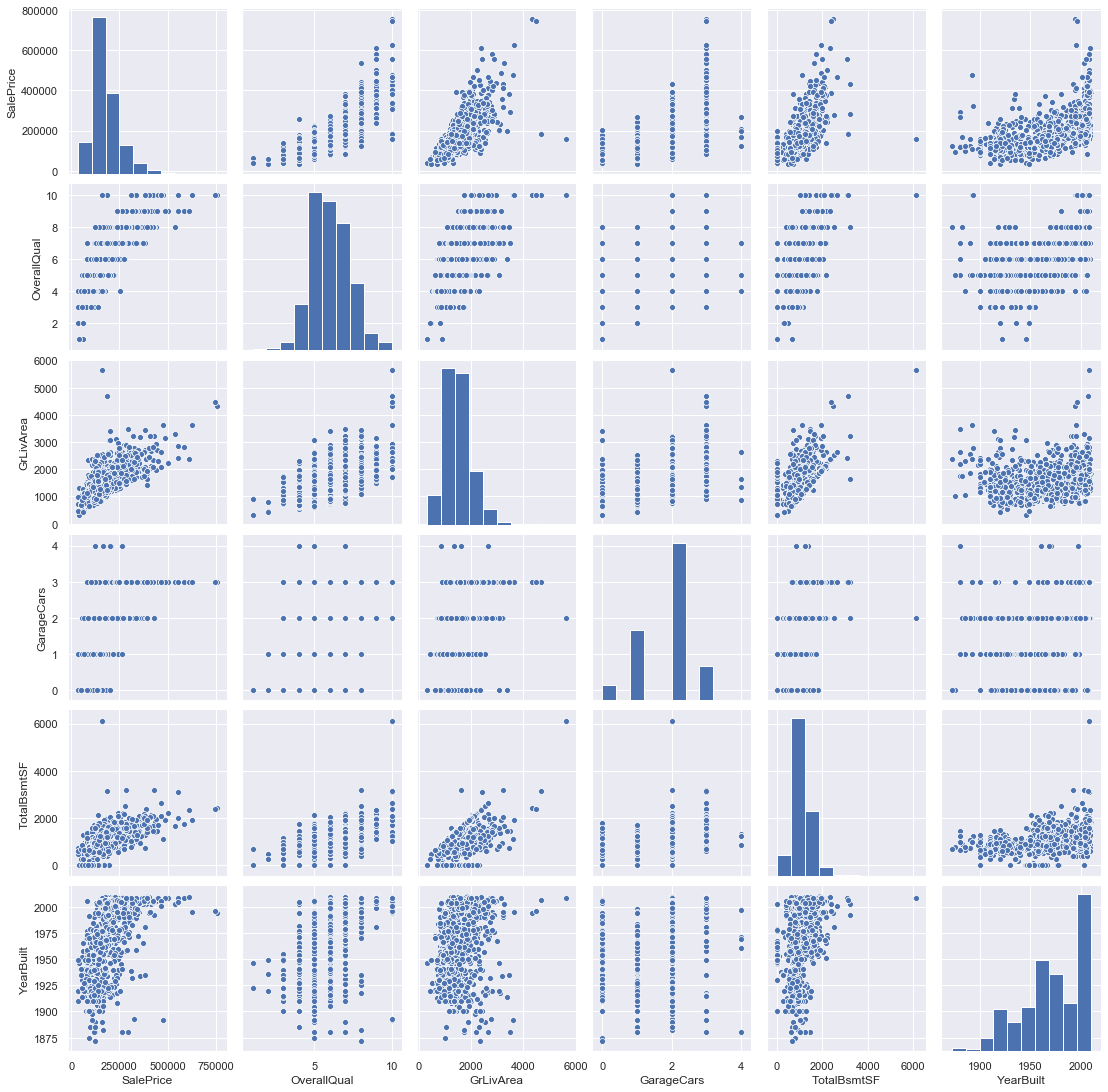

In [14]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

#### Missing Values

In [15]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Drop variables with missing values (Imputation is another choice)

In [16]:
# dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

## Part II. Lasso Regression

In [17]:
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook

In [18]:
df_test = pd.read_csv('./data/house-prices-advanced-regression-techniques/test.csv')
df_train = pd.read_csv('./data/house-prices-advanced-regression-techniques/train.csv')

In [19]:
all_X = pd.concat((df_train.loc[:,'MSSubClass':'SaleCondition'],df_test.loc[:,'MSSubClass':'SaleCondition']))
all_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


#### Transform to log(1+y) to remove skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a225a5110>,
      dtype=object)

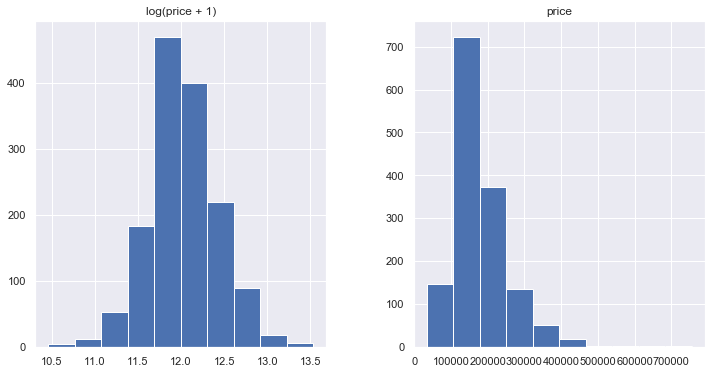

In [20]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":df_train["SalePrice"], "log(price + 1)":np.log1p(df_train["SalePrice"])})
prices.hist()

In [21]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#### log transformation on skewed features/variables 

In [22]:
numeric_var = all_X.dtypes[all_X.dtypes != "object"].index
numeric_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [23]:
skewed_var = df_train[numeric_var].apply(lambda x: skew(x.dropna()))
skewed_var.head()

MSSubClass      1.406210
LotFrontage     2.160866
LotArea        12.195142
OverallQual     0.216721
OverallCond     0.692355
dtype: float64

In [24]:
skewed_var = skewed_var[skewed_var > 0.75]
skewed_var = skewed_var.index

In [25]:
all_X[skewed_var] = np.log1p(all_X[skewed_var])

##### make categorical variables into dummy variables

In [26]:
all_X = pd.get_dummies(all_X)

#### Imputation (fill in mean values)

In [27]:
all_X = all_X.fillna(all_X.mean())

#### Create learning data

In [28]:
X_train = all_X[:df_train.shape[0]]
X_test = all_X[df_train.shape[0]:]
y = df_train.SalePrice

### 1. Ridge

In [29]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [30]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [31]:
model_l2 = Ridge()

In [32]:
alphas = np.logspace(-2,2,50,base=10)

In [33]:
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

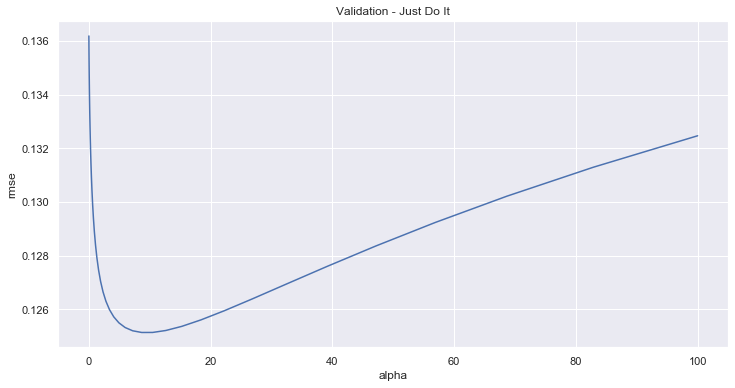

In [34]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Find the best tuning parameter $\alpha$ and its rmse

In [35]:
cv_ridge.nsmallest(1)

8.685114    0.125143
dtype: float64

### 2. Lasso 

In [36]:
model_lasso = LassoCV(alphas=np.logspace(-4,0,100,base=10)).fit(X_train, y)

In [37]:
rmse_cv(model_lasso).mean()

0.12168754015645053

We find that __Lasso__ has smaller rmse than __Ridge__.

In [38]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 107 variables and eliminated the other 181 variables


Make a plot of important features

In [39]:
sig_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

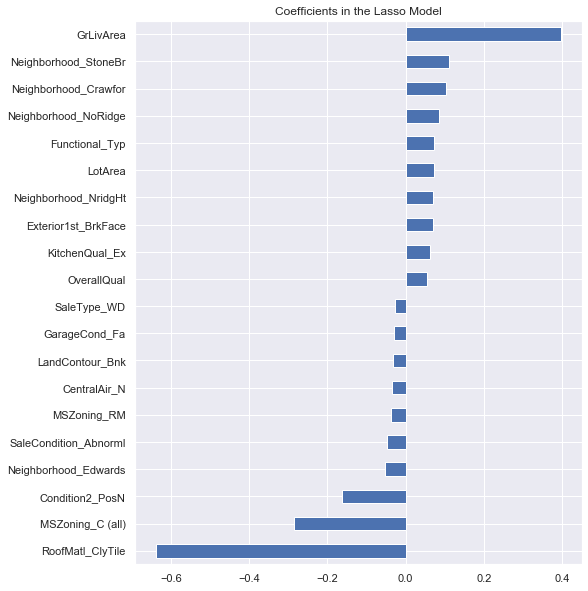

In [40]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
sig_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

#### Predict

In [41]:
lasso_pred = pd.DataFrame({"id":np.arange(1461,2920),"SalePrice":model_lasso.predict(X_test)})
lasso_pred

,id,SalePrice
0,1461,11.693296
1,1462,11.928442
2,1463,12.101448
3,1464,12.194515
4,1465,12.217993
...,...,...
1454,2915,11.401925
1455,2916,11.360746
1456,2917,12.038019
1457,2918,11.688027


In [42]:
lasso_pred.to_csv("lasso_pred.csv")

### 3. XGBoost 

In [43]:
import xgboost as xgb

In [46]:
xgb_train = xgb.DMatrix(X_train, label = y)

In [50]:
params = {"max_depth":6, "eta":0.05}
cv_model = xgb.cv(params, xgb_train,  num_boost_round=500, early_stopping_rounds=100)

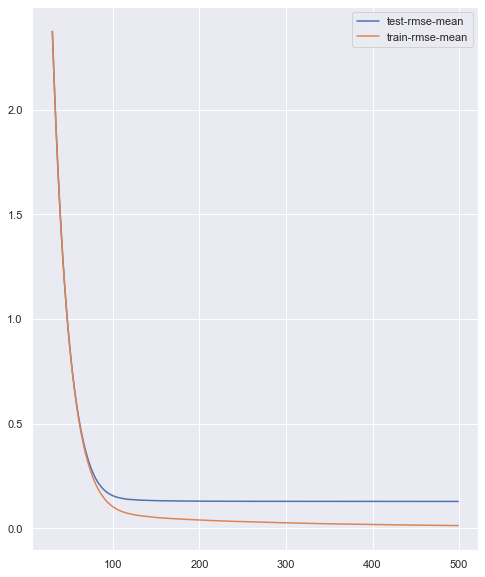

In [51]:
cv_model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [65]:
xgb_model = xgb.XGBRegressor(n_estimators=500, max_depth=2, learning_rate=0.05)

In [66]:
xgb_model.fit(X_train, y)

[21:13:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [70]:
xgb_pred = xgb_model.predict(X_test)

In [71]:
xgb_pred = pd.DataFrame({"id":np.arange(1461,2920),"SalePrice":xgb_pred})
xgb_pred

,id,SalePrice
0,1461,11.705900
1,1462,11.975479
2,1463,12.117635
3,1464,12.159316
4,1465,12.180420
...,...,...
1454,2915,11.325771
1455,2916,11.356617
1456,2917,11.972558
1457,2918,11.670578


In [72]:
xgb_pred.to_csv("xgb_pred.csv",index=False)

In [63]:
compare = pd.merge(xgb_pred,lasso_pred,on="id")

In [64]:
compare

,id,SalePrice_x,SalePrice_y
0,1461,11.732147,11.693296
1,1462,12.000542,11.928442
2,1463,12.144665,12.101448
3,1464,12.165424,12.194515
4,1465,12.114123,12.217993
...,...,...,...
1454,2915,11.236219,11.401925
1455,2916,11.319352,11.360746
1456,2917,11.896452,12.038019
1457,2918,11.669485,11.688027


In [74]:
mean_squared_error(y,xgb_model.predict(X_train))

0.007533145262338828